<a href="https://colab.research.google.com/github/vinic2002/Vnicius-Oliveira/blob/main/desafio_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd

data = pd.read_csv('/content/data (1).csv', encoding='latin1')


In [5]:
data_cleaned = data.drop_duplicates()


In [7]:
data_cleaned = data_cleaned.dropna(subset=['Description'])


In [8]:
data_cleaned = data_cleaned.dropna(subset=['CustomerID'])


In [9]:
data_cleaned = data_cleaned[(data_cleaned['Quantity'] > 0) & (data_cleaned['UnitPrice'] > 0)]


In [10]:
data_cleaned.info()
data_cleaned.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  object 
 1   StockCode    392692 non-null  object 
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  float64
 7   Country      392692 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.0+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,392692,392692,392692,392692.000000,392692,392692.000000,392692.000000,392692
unique,18532,3665,3877,NaN,17282,NaN,NaN,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,11/14/2011 15:27,NaN,NaN,United Kingdom
freq,542,2023,2016,NaN,542,NaN,NaN,349203
mean,NaN,NaN,NaN,13.119702,NaN,3.125914,15287.843865,NaN
std,NaN,NaN,NaN,180.492832,NaN,22.241836,1713.539549,NaN
min,NaN,NaN,NaN,1.000000,NaN,0.001000,12346.000000,NaN
25%,NaN,NaN,NaN,2.000000,NaN,1.250000,13955.000000,NaN
50%,NaN,NaN,NaN,6.000000,NaN,1.950000,15150.000000,NaN
75%,NaN,NaN,NaN,12.000000,NaN,3.750000,16791.000000,NaN


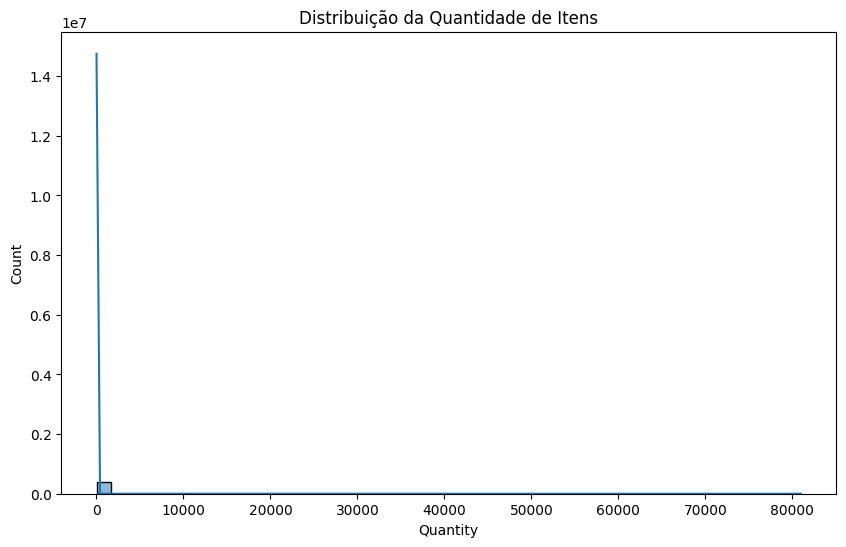

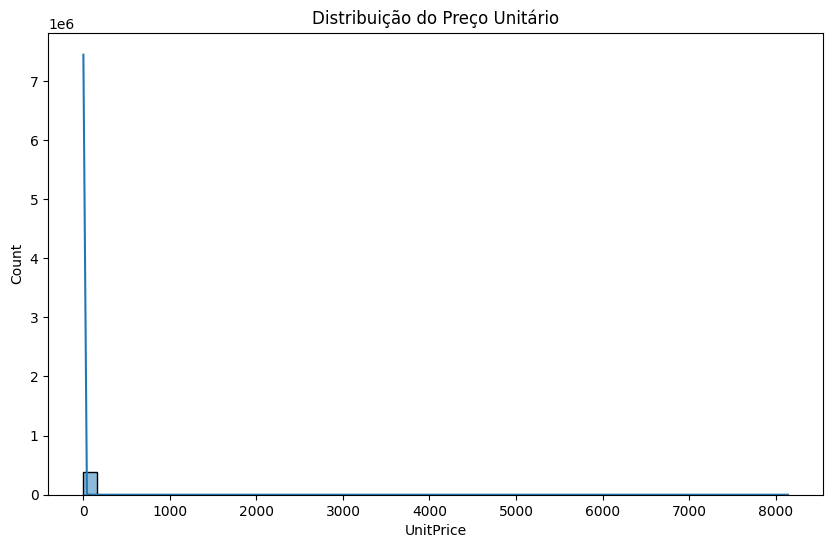

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Quantity'], bins=50, kde=True)
plt.title('Distribuição da Quantidade de Itens')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['UnitPrice'], bins=50, kde=True)
plt.title('Distribuição do Preço Unitário')
plt.show()


In [12]:
import datetime as dt

data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])
snapshot_date = data_cleaned['InvoiceDate'].max() + dt.timedelta(days=1)

rfm = data_cleaned.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'UnitPrice': 'sum'
}).rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'UnitPrice': 'Monetary'})


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

kmeans = KMeans(n_clusters=4, random_state=1)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


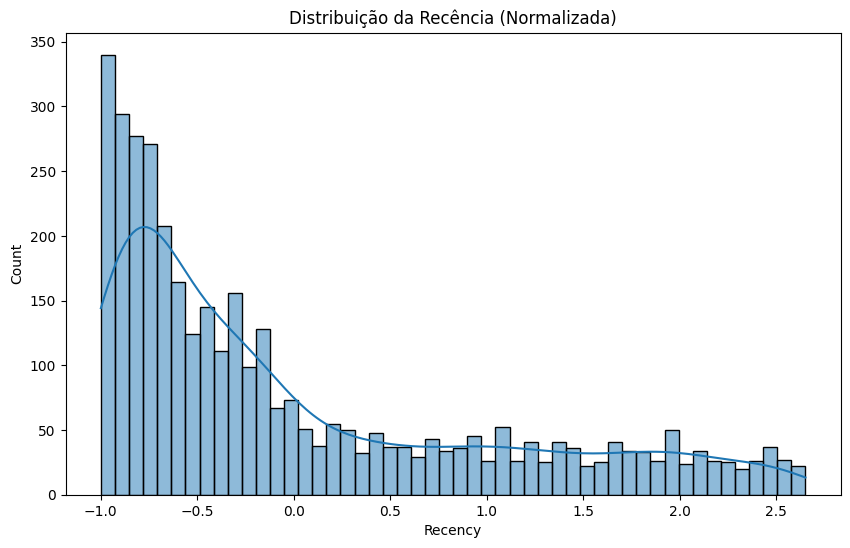

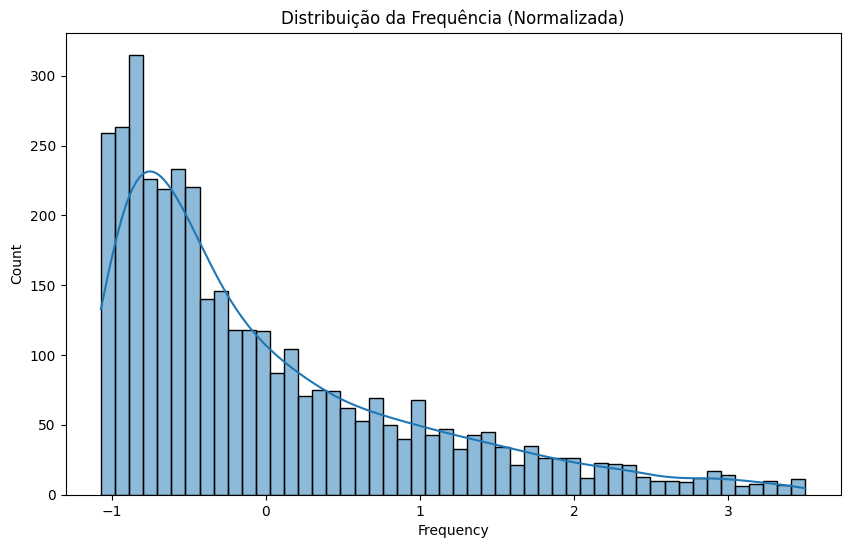

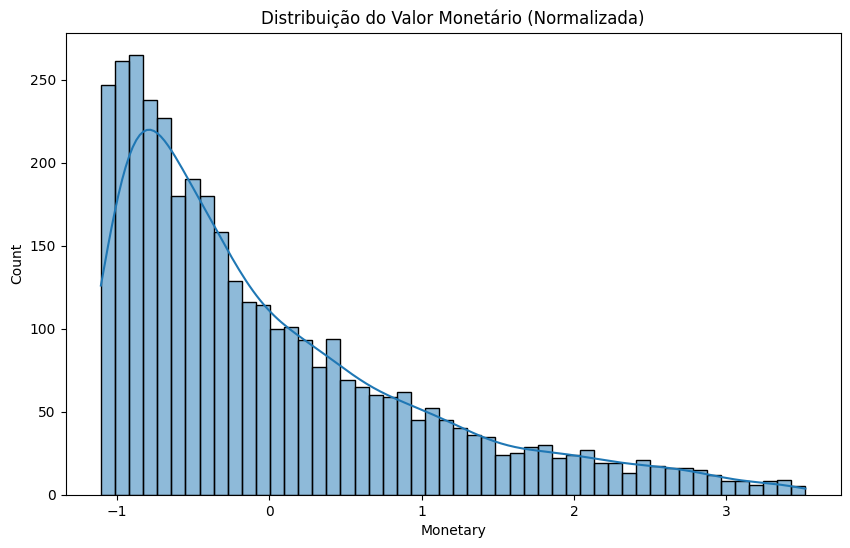

In [15]:
import pandas as pd
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
data = pd.read_csv('/content/data (1).csv', encoding='latin1')

# Remover duplicados
data_cleaned = data.drop_duplicates()

# Tratar valores nulos em 'Description'
data_cleaned = data_cleaned.dropna(subset=['Description'])

# Tratar valores nulos em 'CustomerID' (decisão: remover essas linhas)
data_cleaned = data_cleaned.dropna(subset=['CustomerID'])

# Remover transações com 'Quantity' <= 0 e 'UnitPrice' <= 0
data_cleaned = data_cleaned[(data_cleaned['Quantity'] > 0) & (data_cleaned['UnitPrice'] > 0)]

# Converter 'InvoiceDate' para datetime
data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])

# Calcular recência, frequência e valor monetário (RFM)
snapshot_date = data_cleaned['InvoiceDate'].max() + dt.timedelta(days=1)
rfm = data_cleaned.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'UnitPrice': 'sum'
}).rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'UnitPrice': 'Monetary'})

# Remover outliers (opcional, depende da análise específica)
# Exemplo de remoção de outliers usando o método do IQR
Q1 = rfm.quantile(0.25)
Q3 = rfm.quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[~((rfm < (Q1 - 1.5 * IQR)) | (rfm > (Q3 + 1.5 * IQR))).any(axis=1)]

# Normalizar os dados
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

# Visualizar a distribuição das variáveis após a normalização
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=rfm.columns)

plt.figure(figsize=(10, 6))
sns.histplot(rfm_scaled_df['Recency'], bins=50, kde=True)
plt.title('Distribuição da Recência (Normalizada)')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(rfm_scaled_df['Frequency'], bins=50, kde=True)
plt.title('Distribuição da Frequência (Normalizada)')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(rfm_scaled_df['Monetary'], bins=50, kde=True)
plt.title('Distribuição do Valor Monetário (Normalizada)')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

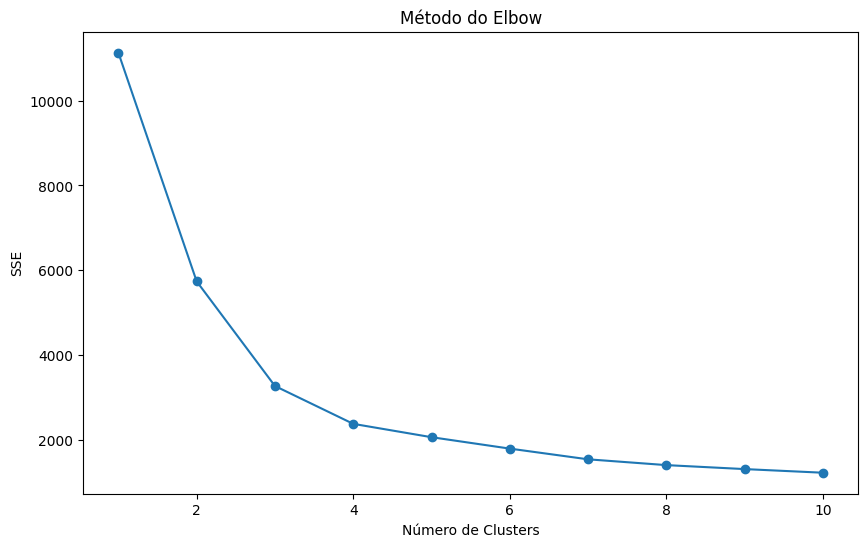

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

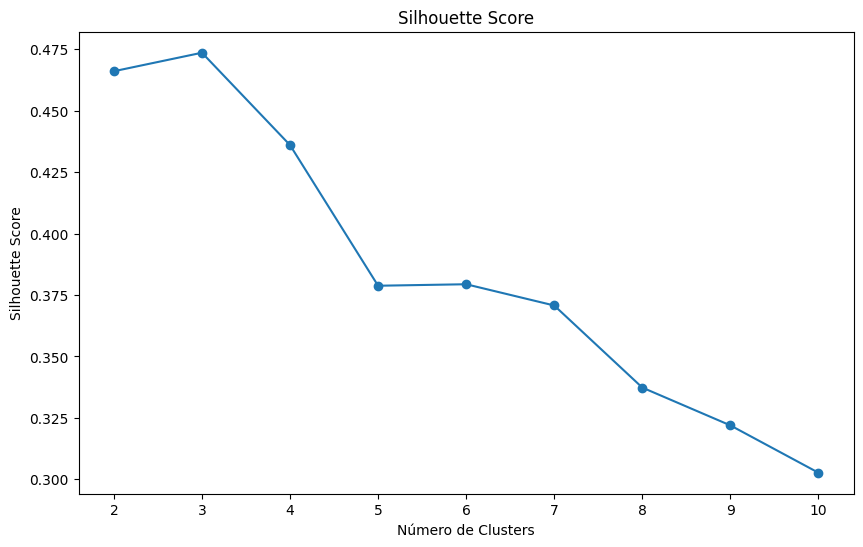

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


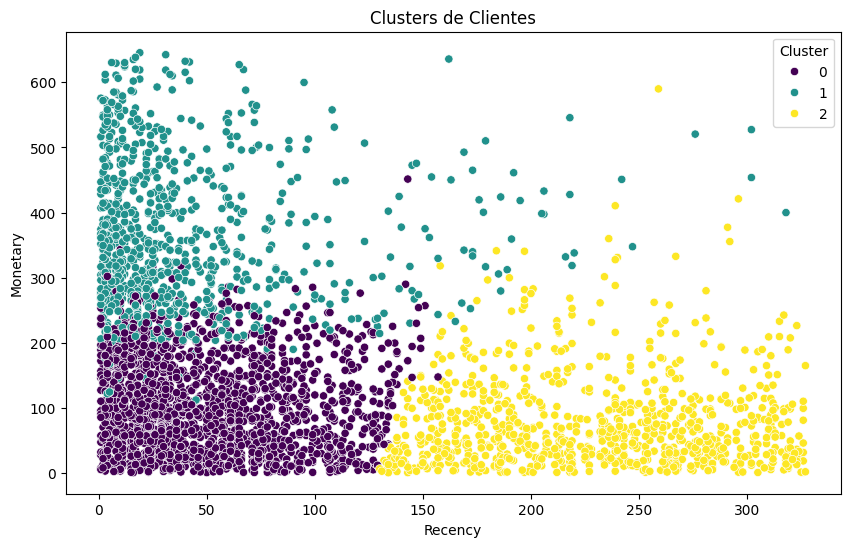

In [17]:
import pandas as pd
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
data = pd.read_csv('/content/data (1).csv', encoding='latin1')

# Remover duplicados
data_cleaned = data.drop_duplicates()

# Tratar valores nulos em 'Description'
data_cleaned = data_cleaned.dropna(subset=['Description'])

# Tratar valores nulos em 'CustomerID' (decisão: remover essas linhas)
data_cleaned = data_cleaned.dropna(subset=['CustomerID'])

# Remover transações com 'Quantity' <= 0 e 'UnitPrice' <= 0
data_cleaned = data_cleaned[(data_cleaned['Quantity'] > 0) & (data_cleaned['UnitPrice'] > 0)]

# Converter 'InvoiceDate' para datetime
data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])

# Calcular recência, frequência e valor monetário (RFM)
snapshot_date = data_cleaned['InvoiceDate'].max() + dt.timedelta(days=1)
rfm = data_cleaned.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'UnitPrice': 'sum'
}).rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'UnitPrice': 'Monetary'})

# Remover outliers (opcional, depende da análise específica)
Q1 = rfm.quantile(0.25)
Q3 = rfm.quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[~((rfm < (Q1 - 1.5 * IQR)) | (rfm > (Q3 + 1.5 * IQR))).any(axis=1)]

# Normalizar os dados
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

# Encontrar a quantidade ideal de clusters usando o método do Elbow
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Método do Elbow')
plt.xlabel('Número de Clusters')
plt.ylabel('SSE')
plt.show()

# Encontrar a quantidade ideal de clusters usando o Silhouette Score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    labels = kmeans.fit_predict(rfm_scaled)
    silhouette_scores.append(silhouette_score(rfm_scaled, labels))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Implementar o algoritmo de clusterização com o número ideal de clusters (supondo que seja 3)
kmeans = KMeans(n_clusters=3, random_state=1)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Visualizar os clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='Monetary', hue='Cluster', data=rfm, palette='viridis')
plt.title('Clusters de Clientes')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.show()


<ipython-input-19-fa627ad2309f>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Figure size 1200x800 with 0 Axes>

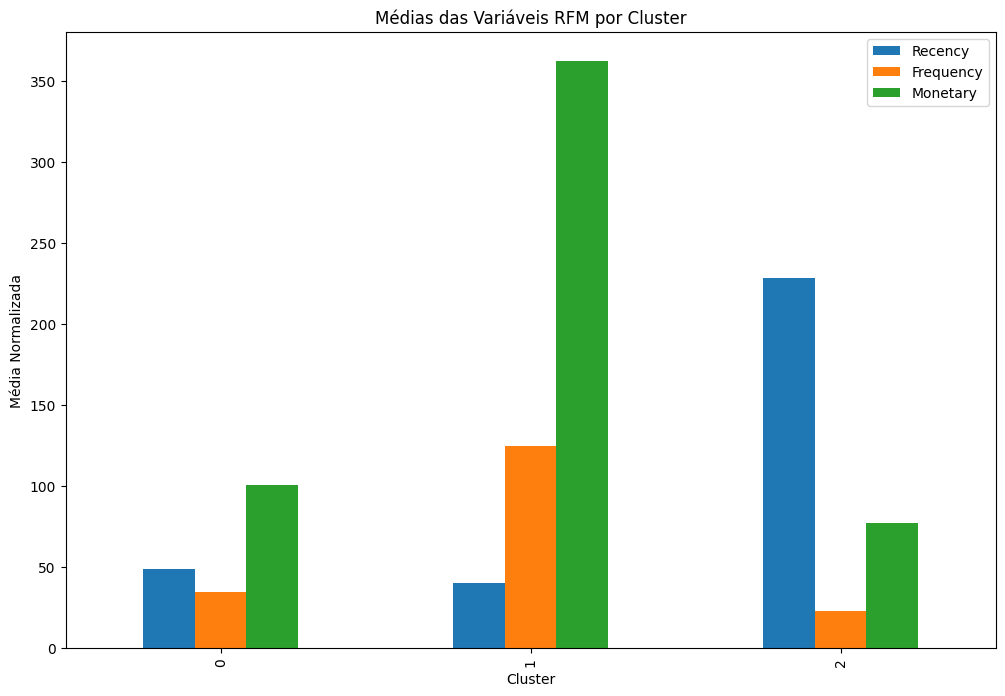

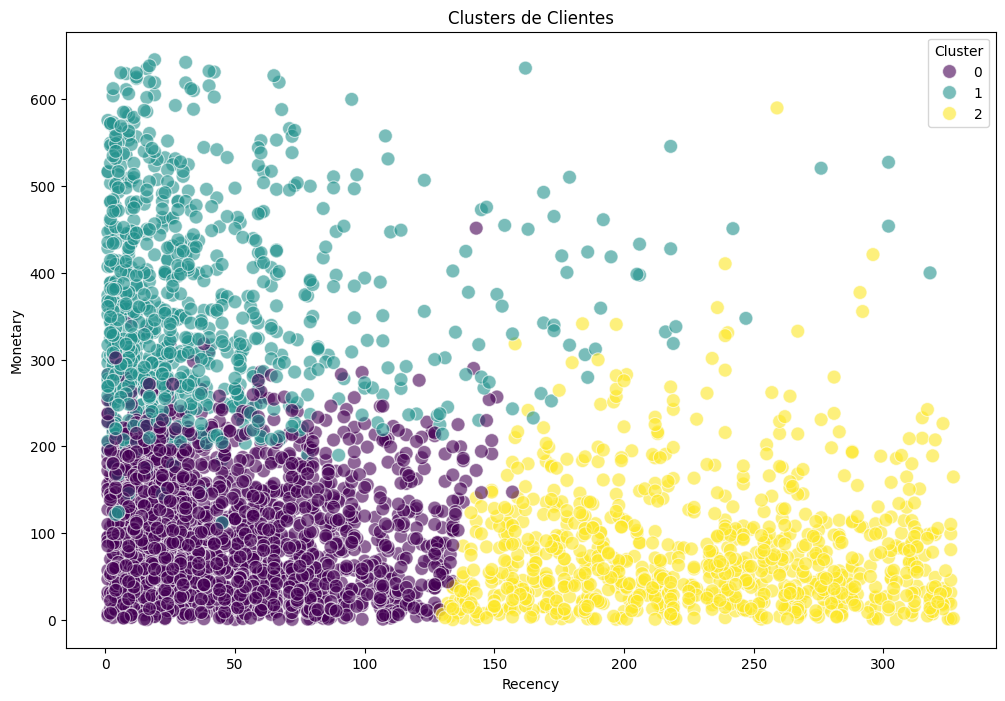

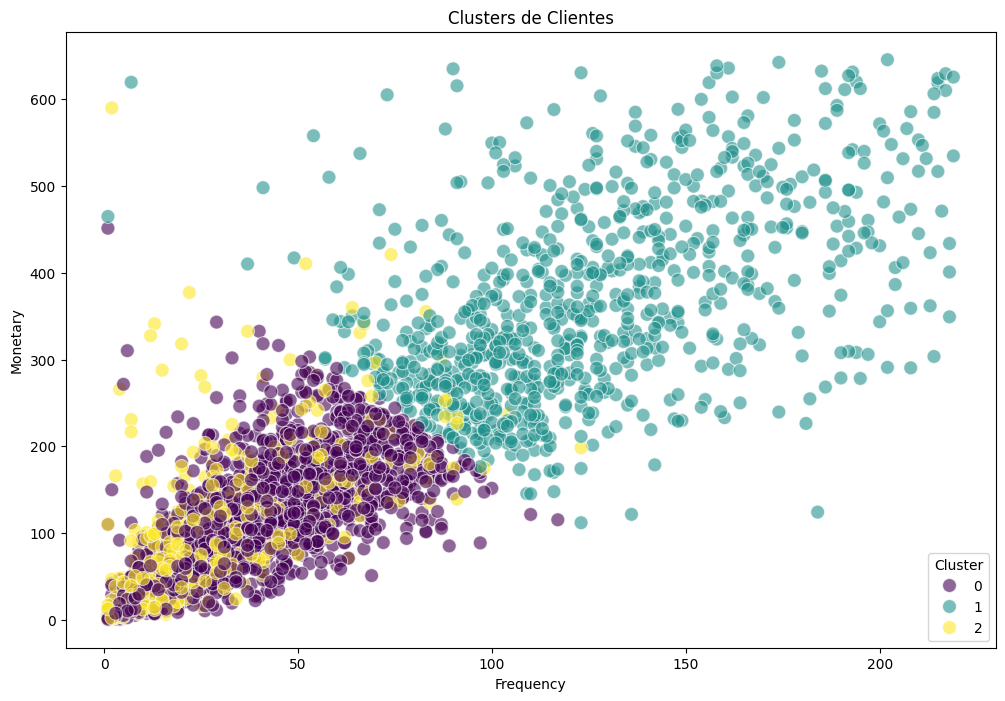

In [19]:
import pandas as pd
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
data = pd.read_csv('/content/data (1).csv', encoding='latin1')

# Remover duplicados
data_cleaned = data.drop_duplicates()

# Tratar valores nulos em 'Description'
data_cleaned = data_cleaned.dropna(subset=['Description'])

# Tratar valores nulos em 'CustomerID' (decisão: remover essas linhas)
data_cleaned = data_cleaned.dropna(subset=['CustomerID'])

# Remover transações com 'Quantity' <= 0 e 'UnitPrice' <= 0
data_cleaned = data_cleaned[(data_cleaned['Quantity'] > 0) & (data_cleaned['UnitPrice'] > 0)]

# Converter 'InvoiceDate' para datetime
data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])

# Calcular recência, frequência e valor monetário (RFM)
snapshot_date = data_cleaned['InvoiceDate'].max() + dt.timedelta(days=1)
rfm = data_cleaned.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'UnitPrice': 'sum'
}).rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'UnitPrice': 'Monetary'})

# Remover outliers usando o método do IQR
Q1 = rfm.quantile(0.25)
Q3 = rfm.quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[~((rfm < (Q1 - 1.5 * IQR)) | (rfm > (Q3 + 1.5 * IQR))).any(axis=1)]

# Normalizar os dados
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

# Implementar o algoritmo de clusterização com o número ideal de clusters (supondo que seja 3)
kmeans = KMeans(n_clusters=3, random_state=1)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Analisar os clusters
cluster_analysis = rfm.groupby('Cluster').agg({
    'Recency': ['mean', 'std'],
    'Frequency': ['mean', 'std'],
    'Monetary': ['mean', 'std']
}).reset_index()

# Plotar gráficos para auxiliar na análise
plt.figure(figsize=(12, 8))

# Gráfico de barras das médias
rfm.groupby('Cluster').mean().plot(kind='bar', figsize=(12, 8))
plt.title('Médias das Variáveis RFM por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Média Normalizada')
plt.show()

# Gráfico de dispersão
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Recency', y='Monetary', hue='Cluster', data=rfm, palette='viridis', s=100, alpha=0.6)
plt.title('Clusters de Clientes')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Frequency', y='Monetary', hue='Cluster', data=rfm, palette='viridis', s=100, alpha=0.6)
plt.title('Clusters de Clientes')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.show()


In [20]:
# Analisar os clusters
cluster_analysis = rfm.groupby('Cluster').agg({
    'Recency': ['mean', 'std'],
    'Frequency': ['mean', 'std'],
    'Monetary': ['mean', 'std']
}).reset_index()

cluster_analysis.columns = ['Cluster', 'Recency_Mean', 'Recency_Std', 'Frequency_Mean', 'Frequency_Std', 'Monetary_Mean', 'Monetary_Std']
cluster_analysis


,Cluster,Recency_Mean,Recency_Std,Frequency_Mean,Frequency_Std,Monetary_Mean,Monetary_Std
0,0,48.783756,35.842751,34.221827,22.462407,100.343753,68.927962
1,1,40.330579,47.299826,124.723731,37.996879,362.090521,112.608148
2,2,228.567114,53.655442,22.512304,19.372790,77.348423,71.245007
